In [2]:
import pandas as pd

### Dataset

In [3]:
data = pd.read_csv('R04_corruptions.csv')
data.head()

,Corruption Perception (X),Government Transparency (Y)
0,3.2,65
1,2.5,72
2,4.1,58
3,2.8,68
4,3.5,60


### Korelasi

In [4]:
# menhitung korelasi antar kolom
data.corr()

,Corruption Perception (X),Government Transparency (Y)
Corruption Perception (X),1.000000,-0.920063
Government Transparency (Y),-0.920063,1.000000


### Split Data

In [5]:
# memudahkan visualisasi data
import numpy as np
Corruption_Perception_X = data['Corruption Perception (X)'].values[:, np.newaxis]
Government_Transparency_Y =  data['Government Transparency (Y)'].values

### Modelling

In [6]:
# melatih model regresi linear
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

model1.fit(Corruption_Perception_X, Government_Transparency_Y)

LinearRegression()

### Testing

In [7]:
# memprediksi kolom y
Corruption_Perception_X_test = [[3],[4.5]]
pred_Government_Transparency_Y = model1.predict(Corruption_Perception_X_test)

print("Prediksi Pemerintah: ", pred_Government_Transparency_Y)

Prediksi Pemerintah:  [67.5018818  51.11695587]


In [8]:
# rumus regresi -> y = ax + b (a = koefisien, b = intercept)
print("Koefisien: ", model1.coef_)
print("Intercept: ", model1.intercept_)

Koefisien:  [-10.92328395]
Intercept:  100.27173366009497


In [9]:
# testing rumus
y = model1.coef_* 25 + model1.intercept_
print(y)

[-172.8103652]


### Visualisasi

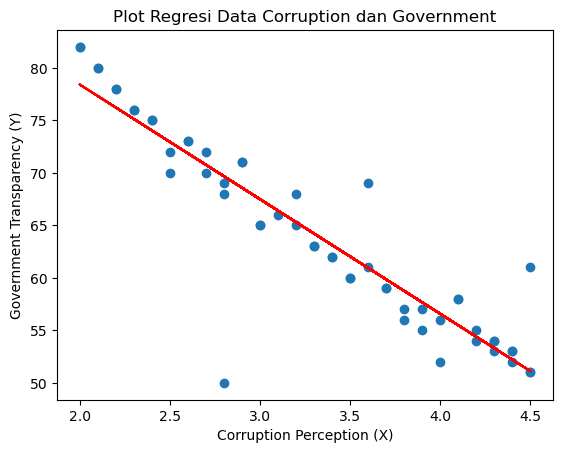

In [10]:
# melihat hasil visualisasi data 
import matplotlib.pyplot as plt 

prediksi_Government_Transparency_Y = model1.predict(Corruption_Perception_X)
dataframe_baru = pd.DataFrame({'Corruption Perception (X)': data['Corruption Perception (X)'], 'Government Transparency (Y)': prediksi_Government_Transparency_Y})
plt.scatter(data['Corruption Perception (X)'], data['Government Transparency (Y)'])
plt.plot(dataframe_baru['Corruption Perception (X)'], dataframe_baru['Government Transparency (Y)'], color='red')
plt.xlabel('Corruption Perception (X)')
plt.ylabel('Government Transparency (Y)')
plt.title('Plot Regresi Data Corruption dan Government')
plt.show()